In [70]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from word2number import w2n
import matplotlib.pyplot as plt

In [86]:
d = pd.read_csv("hiring.csv")
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,700.0,8,80000


In [72]:
import math
test_score_median = math.floor(d['test_score(out of 10)'].median())
d['test_score(out of 10)'] = d['test_score(out of 10)'].fillna(test_score_median)
d


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [73]:
d.experience = d.experience.fillna("zero")
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [74]:
d.experience = d.experience.apply(w2n.word_to_num)
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [85]:
import math
median_test_score = math.floor(d['test_score(out of 10)'].median())
median_test_score


8

In [76]:
d['test_score(out of 10)'] = d['test_score(out of 10)'].fillna(median_test_score)
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


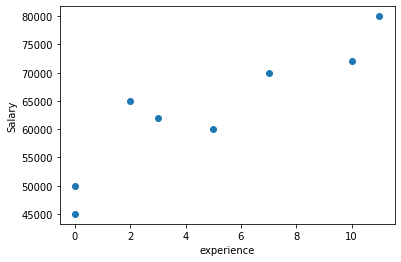

In [77]:
%matplotlib inline
plt.xlabel("experience")
plt.ylabel("Salary")
plt.scatter(d['experience'], d['salary($)'])


In [78]:
reg = linear_model.LinearRegression()
reg.fit(d[['experience','test_score(out of 10)','interview_score(out of 10)']],d['salary($)'])

LinearRegression()

In [79]:
reg.predict([[2,9,6]])

c:\Users\AminFarvardin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [80]:
reg.predict([[12,10,10]])

c:\Users\AminFarvardin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])

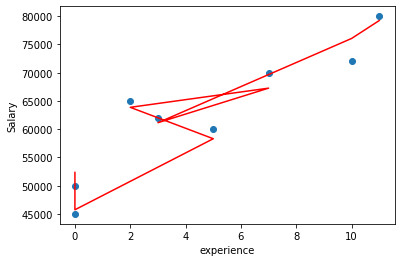

In [83]:
%matplotlib inline
plt.xlabel("experience")
plt.ylabel("Salary")
plt.scatter(d.experience, d['salary($)'])
# plt.scatter(d['test_score(out of 10)'], d['salary($)'])

plt.plot(d.experience, reg.predict(
    d[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']]), color='red')
